<a href="https://colab.research.google.com/github/axndyg/sagb_inrto_project/blob/main/Fouls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('/content/events_France.csv')

In [99]:
display(df)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85.0,176505119,[1801],51,50,46,31
1,8,High pass,[{'id': 1801}],29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686,Pass,3799,1H,3.599295,83.0,176505121,[1801],46,31,74,68
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",253784,"[{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]",2500686,Duel,3799,1H,6.827043,10.0,176505122,"[703, 1801]",74,68,54,72
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",56441,"[{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]",2500686,Duel,3772,1H,6.985577,10.0,176505017,"[701, 1802]",26,32,46,28
4,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",366760,"[{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]",2500686,Duel,3799,1H,9.511272,11.0,176505124,"[702, 1801]",54,72,55,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632732,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",28866,"[{'y': 69, 'x': 60}, {'y': 69, 'x': 56}]",2501065,Duel,3795,2H,2562.063865,13.0,253316882,"[701, 1802]",29,12,35,13
632733,8,Head pass,[{'id': 1802}],70093,"[{'y': 31, 'x': 44}, {'y': 34, 'x': 66}]",2501065,Pass,19830,2H,2562.291097,82.0,253316907,[1802],65,87,100,100
632734,8,Simple pass,[{'id': 1801}],29291,"[{'y': 66, 'x': 34}, {'y': 49, 'x': 12}]",2501065,Pass,3795,2H,2566.359541,85.0,253316883,[1801],0,0,35,13
632735,8,Launch,[{'id': 1801}],25521,"[{'y': 49, 'x': 12}, {'y': 64, 'x': 62}]",2501065,Pass,3795,2H,2570.079541,84.0,253316884,[1801],52,50,47,44


In [100]:
df_head = df[['eventId', 'subEventName', 'matchId', 'teamId', 'matchPeriod', 'eventSec']]

In [101]:
display(df_head)

,eventId,subEventName,matchId,teamId,matchPeriod,eventSec
0,8,Simple pass,2500686,3799,1H,1.935181
1,8,High pass,2500686,3799,1H,3.599295
2,1,Air duel,2500686,3799,1H,6.827043
3,1,Air duel,2500686,3772,1H,6.985577
4,1,Ground attacking duel,2500686,3799,1H,9.511272
...,...,...,...,...,...,...
632732,1,Ground loose ball duel,2501065,3795,2H,2562.063865
632733,8,Head pass,2501065,19830,2H,2562.291097
632734,8,Simple pass,2501065,3795,2H,2566.359541
632735,8,Launch,2501065,3795,2H,2570.079541


In [102]:
if 'matchPeriod' in df_head.columns:
  df_head.loc[df_head['matchPeriod'] == '2H', 'eventSec'] += 2700

else:
  print["no"]

print(df_head)

        eventId            subEventName  matchId  teamId matchPeriod  \
0             8             Simple pass  2500686    3799          1H   
1             8               High pass  2500686    3799          1H   
2             1                Air duel  2500686    3799          1H   
3             1                Air duel  2500686    3772          1H   
4             1   Ground attacking duel  2500686    3799          1H   
...         ...                     ...      ...     ...         ...   
632732        1  Ground loose ball duel  2501065    3795          2H   
632733        8               Head pass  2501065   19830          2H   
632734        8             Simple pass  2501065    3795          2H   
632735        8                  Launch  2501065    3795          2H   
632736        1                Air duel  2501065    3795          2H   

           eventSec  
0          1.935181  
1          3.599295  
2          6.827043  
3          6.985577  
4          9.511272  
...

In [103]:
display(df_head)

,eventId,subEventName,matchId,teamId,matchPeriod,eventSec
0,8,Simple pass,2500686,3799,1H,1.935181
1,8,High pass,2500686,3799,1H,3.599295
2,1,Air duel,2500686,3799,1H,6.827043
3,1,Air duel,2500686,3772,1H,6.985577
4,1,Ground attacking duel,2500686,3799,1H,9.511272
...,...,...,...,...,...,...
632732,1,Ground loose ball duel,2501065,3795,2H,5262.063865
632733,8,Head pass,2501065,19830,2H,5262.291097
632734,8,Simple pass,2501065,3795,2H,5266.359541
632735,8,Launch,2501065,3795,2H,5270.079541


In [104]:
df_head2 = df_head[['eventId', 'subEventName', 'matchId', 'teamId', 'eventSec']]

In [105]:
display(df_head2)

,eventId,subEventName,matchId,teamId,eventSec
0,8,Simple pass,2500686,3799,1.935181
1,8,High pass,2500686,3799,3.599295
2,1,Air duel,2500686,3799,6.827043
3,1,Air duel,2500686,3772,6.985577
4,1,Ground attacking duel,2500686,3799,9.511272
...,...,...,...,...,...
632732,1,Ground loose ball duel,2501065,3795,5262.063865
632733,8,Head pass,2501065,19830,5262.291097
632734,8,Simple pass,2501065,3795,5266.359541
632735,8,Launch,2501065,3795,5270.079541


In [106]:
df_head2 = df_head2[df_head2['subEventName'] == 'Foul']

df_head2 = df_head2[df_head2['eventSec'] > 2700]

df_head2 = df_head2[df_head2['matchId'] == 2500686]


df_head2['cumulative_fouls'] = df_head2.index - df_head2.index[0] + 1

total = len(df)

df_head2['density'] = df_head2['cumulative_fouls'] / total


print(df_head2)

      eventId subEventName  matchId  teamId     eventSec  cumulative_fouls  \
886         2         Foul  2500686    3772  2858.194083                 1   
1114        2         Foul  2500686    3799  3305.941739               229   
1121        2         Foul  2500686    3772  3330.700506               236   
1206        2         Foul  2500686    3799  3569.906790               321   
1237        2         Foul  2500686    3799  3722.875858               352   
1267        2         Foul  2500686    3772  3825.254017               382   
1300        2         Foul  2500686    3799  3967.036619               415   
1358        2         Foul  2500686    3799  4151.899848               473   
1400        2         Foul  2500686    3799  4326.542362               515   
1453        2         Foul  2500686    3799  4618.095908               568   
1485        2         Foul  2500686    3772  4728.311140               600   
1573        2         Foul  2500686    3799  5043.348763        

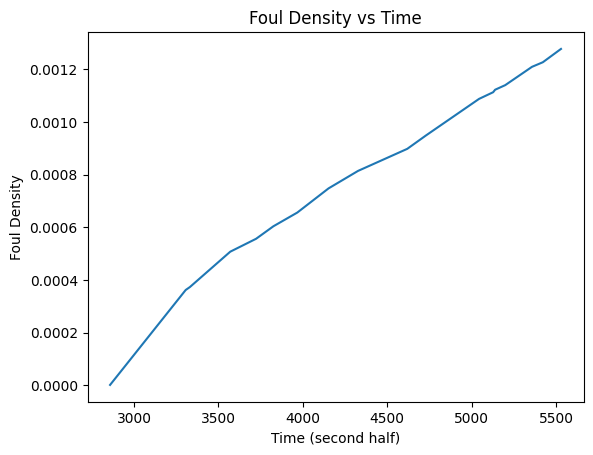

In [107]:
plt.plot(df_head2['eventSec'], df_head2['density'])
plt.xlabel('Time (second half)')
plt.ylabel('Foul Density')
plt.title('Foul Density vs Time')
plt.show()

In [ ]:
plt.plot(df_head2['eventSec'], df_head2['density'])
plt.xlabel('Time (second half)')
plt.ylabel('Foul Density')
plt.title('Foul Density vs Time')
plt.show()